# Heart Disease Analysis

In [79]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

Importing the data

In [54]:
df = pd.read_csv('C:/Users/Pranjal/Downloads/heart_2020_cleaned.csv')
print(df.head(2))

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  


Analysing the data

In [55]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

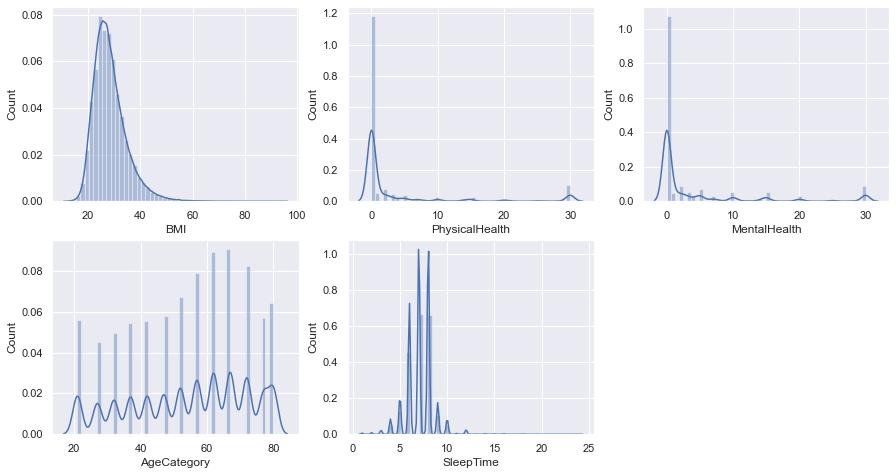

In [80]:
warnings.simplefilter(action='ignore', category=FutureWarning)
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

i=1
plt.figure(figsize = (15,25))
for feature in numeric_features.columns:
    plt.subplot(6,3,i)
    sns.distplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

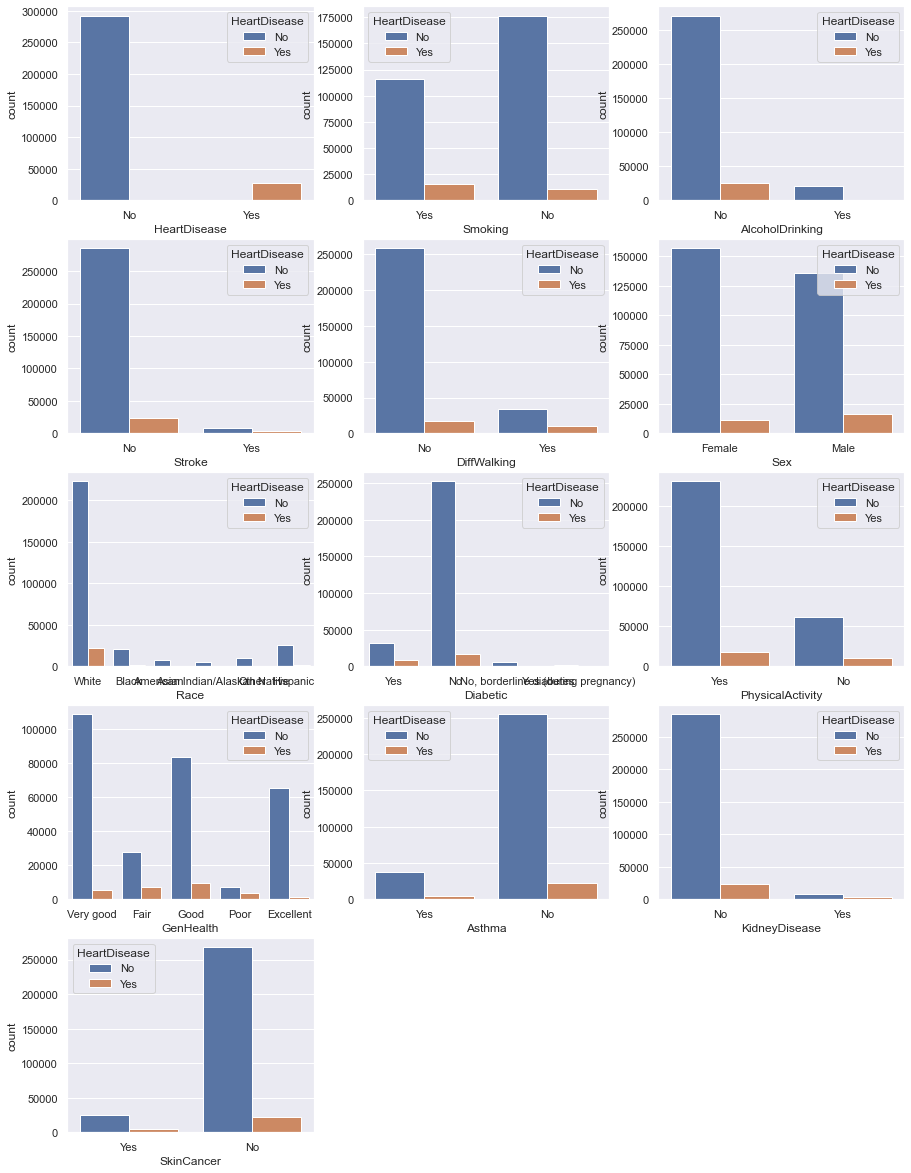

In [83]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

i = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature, hue = 'HeartDisease' , data = df)
    i +=1

<AxesSubplot:xlabel='Sex', ylabel='Count'>

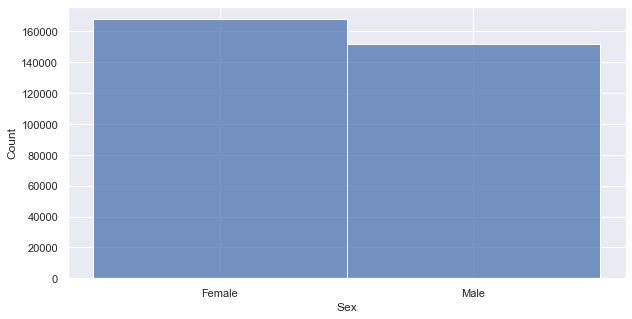

In [57]:
sns.histplot(x='Sex',  data =df)

<AxesSubplot:xlabel='Race', ylabel='Count'>

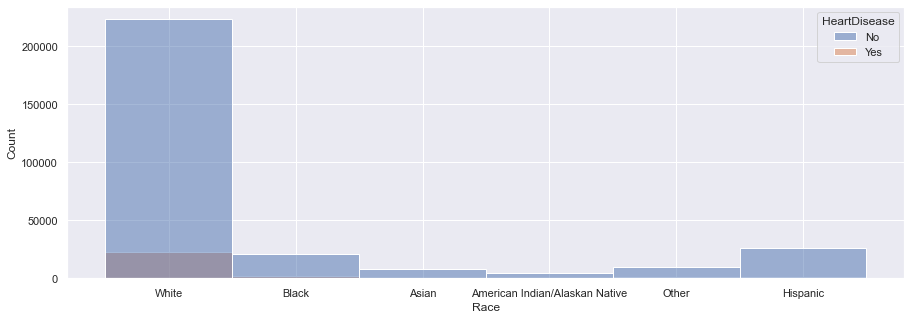

In [84]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot(x = 'Race', hue = 'HeartDisease', data =df)

# Data Preprocessing

In [59]:
# Converting the Age category range into mean values
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [60]:
# Converting Categorical Data into integers for classification
lst  = ['Smoking', 'Race', 'AlcoholDrinking', 'Stroke', 
        'DiffWalking','Diabetic', 'Sex', 'Asthma',
        'KidneyDisease', 'SkinCancer','PhysicalActivity',
        'GenHealth', 'HeartDisease']

def preprocess(a):
    dummy = pd.get_dummies(df[a])
    dummy = dummy.iloc[:,:-1]   # To avoid Dummy variable trap
    return dummy

Final = df.iloc[:,:]
for i in lst:
    temp = []
    temp = preprocess(i)
    Final = pd.concat([Final, temp], axis = 'columns')
    Final = Final.drop([i], axis = 'columns')
    if 'Yes' in Final.columns:
        Final.rename(columns = {'Yes': i}, inplace = True)
    if 'No' in Final.columns:
        Final.rename(columns = {'No': i}, inplace = True)

# Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
Final[['BMI','AgeCategory', 'PhysicalHealth','MentalHealth','SleepTime']] = sc_x.fit_transform(Final[['BMI','AgeCategory', 'PhysicalHealth','MentalHealth','SleepTime']])
print(Final.head(2))

        BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  Smoking  \
0 -1.844750       -0.046751      3.281069     0.149220  -1.460354        0   
1 -1.256338       -0.424070     -0.490039     1.447159  -0.067601        1   

   American Indian/Alaskan Native  Asian  Black  Hispanic  ...  Female  \
0                               0      0      0         0  ...       1   
1                               0      0      0         0  ...       1   

   Asthma  KidneyDisease  SkinCancer  PhysicalActivity  Excellent  Fair  Good  \
0       0              1           0                 0          0     0     0   
1       1              1           1                 0          0     0     0   

   Poor  HeartDisease  
0     0             1  
1     0             1  

[2 rows x 27 columns]


# Splitting the Data for testing and training

In [62]:
x = Final.iloc[:,0:-1].values
y = Final.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 1)


# Implementing Random Forest Classifier on Unbalanced Data

In [63]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 11, random_state = 1)
RFC.fit(X_train,y_train)

#Predictions
y_pred = RFC.predict(X_test)

27373 292422


Text(0.5, 1.0, 'Unbalanced Data')

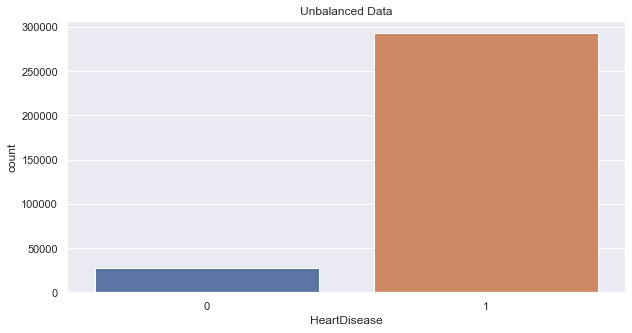

In [64]:
# Visualizing the unbalance

major = len(Final[Final['HeartDisease']==1])
minor = len(Final[Final['HeartDisease']==0])
print(minor, major)

ub = sns.countplot(x = 'HeartDisease', data = Final)
ub.set_title('Unbalanced Data')

# Implementing Random Undersampling

[[Text(0, 0, 'Yes'), Text(1, 0, 'No')]]

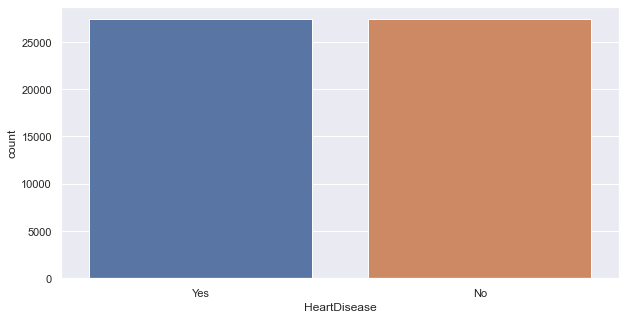

In [65]:
major_idx = Final[Final['HeartDisease']==1].index
minor_idx = Final[Final['HeartDisease']==0].index
# Getting random sample of size of Minor class from Mjor class indices
rand_mjr_idx = np.random.choice(major_idx,minor,replace = False)

Under_sampled_idx = np.concatenate([rand_mjr_idx,minor_idx])

# Visualizing the Balanced classes
u_data = Final.loc[Under_sampled_idx]
plott = sns.countplot(x = u_data['HeartDisease'], data = u_data)
plott.set(xticklabels= ['Yes', 'No'])

# Implementing Synthetic Minority Oversampling

[[Text(0, 0, 'Yes'), Text(1, 0, 'No')]]

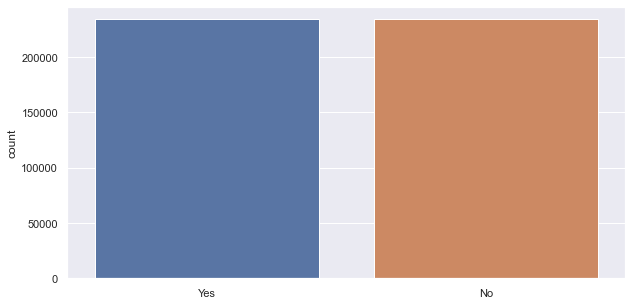

In [81]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
sm_t = SMOTE(random_state = 2)
X_test_res, y_test_res = sm_t.fit_resample(X_test,y_test.ravel())
smote = sns.countplot(y_train_res)
smote.set(xticklabels= ['Yes', 'No'])

# Implementing Random Forrest Classifier on Balanced data

In [67]:
ux = u_data.iloc[:,0:-1].values
uy = u_data.iloc[:,-1].values

# Data Split
from sklearn.model_selection import train_test_split
ux_train, ux_test, uy_train, uy_test = train_test_split(ux,uy, test_size= 0.2, random_state= 1)

# Model for Undersampling data
from sklearn.ensemble import RandomForestClassifier
uRFC = RandomForestClassifier(n_estimators = 13, max_depth=8,random_state = 1)
uRFC.fit(ux_train,uy_train)

#Predictions
uy_pred = uRFC.predict(ux_test)

# Model for SMOTE balanced data
from sklearn.ensemble import RandomForestClassifier
sm_rf = RandomForestClassifier(n_estimators = 13, max_depth=8,random_state = 1)
sm_rf.fit(X_train_res,y_train_res)

sm_pred = sm_rf.predict(X_test_res)

# Report and Comparision

In [68]:
# Report
from sklearn.metrics import classification_report
target_names = ['Heart Disease', 'No Heart Disease']
print('Unbalanced data Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after undersampling:')
print(classification_report(uy_test, uy_pred, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after SMOTE:')
print(classification_report(y_test_res, sm_pred, target_names=target_names))

Unbalanced data Report:
                  precision    recall  f1-score   support

   Heart Disease       0.33      0.16      0.21      5385
No Heart Disease       0.93      0.97      0.95     58574

        accuracy                           0.90     63959
       macro avg       0.63      0.56      0.58     63959
    weighted avg       0.88      0.90      0.89     63959

***********************************************************
Balanced data Report after undersampling:
                  precision    recall  f1-score   support

   Heart Disease       0.73      0.81      0.77      5459
No Heart Disease       0.79      0.71      0.75      5491

        accuracy                           0.76     10950
       macro avg       0.76      0.76      0.76     10950
    weighted avg       0.76      0.76      0.76     10950

***********************************************************
Balanced data Report after SMOTE:
                  precision    recall  f1-score   support

   Heart Disease   

[[Text(0.5, 0, 'Yes'), Text(1.5, 0, 'No')],
 [Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]]

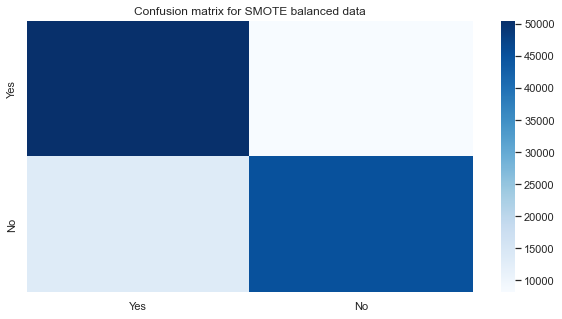

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_res, sm_pred)
hm = sns.heatmap(cm, cmap='Blues')
hm.set_title('Confusion matrix for SMOTE balanced data')
hm.set(xticklabels= ['Yes', 'No'], yticklabels = ['Yes', 'No'])